### **TP réalisé par :**
- **Khadija Ben talha**
- **Pélagie Abiré Poko**
- **Oumaima Laghlid**


#**Analyse des Prix des Carburants en France**

## **Introduction**
Dans ce notebook, nous allons explorer et visualiser les données des prix des carburants en France, disponibles sur le site officiel du gouvernement français.

## 1/ Collecte des Données

Pour commencer, nous devons collecter les données open source des prix de carburants de l'année 2007 à 2022 à partir du site officiel du gouvernement français. Les données sont disponibles à l'adresse suivante : [Lien vers les données](https://www.prix-carburants.gouv.fr/rubrique/opendata/).

### Importation des librairies nécessaire

In [1]:
import requests # Importer la bibliothèque requests pour effectuer des requêtes HTTP
import zipfile # Importer la bibliothèque zipfile pour gérer les fichiers ZIP
import xml.etree.ElementTree as ET # Importer la bibliothèque ElementTree pour traiter des fichiers XML
import pandas as pd # Importer la bibliothèque pandas pour la manipulation de données tabulaires
from io import BytesIO # Importer BytesIO pour travailler avec des données en mémoire
import pandas as pd
import xml.etree.ElementTree as ET
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

On scrappe les donées de chaque année directement à partir du site, au raison de la complexité spatiale on traite juste les années de 2007 jusqu'à 2015

In [2]:
# Années de 2007 à 2022
annees = range(2007, 2015)

# Créer une liste pour stocker les DataFrames de chaque année
dfs = []

# Boucle sur les années
for annee in annees:
    # Construisez l'URL et le nom de fichier correspondants pour chaque année
    zip_url = f"https://donnees.roulez-eco.fr/opendata/annee/{annee}"
    xml_file_name = f"PrixCarburants_annuel_{annee}.xml"

    # Effectuez une requête HTTP pour obtenir le contenu du fichier ZIP
    response = requests.get(zip_url)

    # Vérifiez si la requête a réussi (statut 200)
    if response.status_code == 200:
        # Lisez le contenu du fichier ZIP depuis la réponse HTTP
        with zipfile.ZipFile(BytesIO(response.content), "r") as zip_file:
            # Recherchez le fichier XML dans le ZIP (ajustez le nom du fichier si nécessaire)
            if xml_file_name in zip_file.namelist():
                # Extrayez le fichier XML du ZIP
                with zip_file.open(xml_file_name) as xml_file:
                    # Analysez le contenu XML
                    root = ET.fromstring(xml_file.read())

                    # Parcourez les balises "prix" et extrayez les attributs
                    data = []

                    for prix in root.findall(".//prix"):
                        row = {}
                        row["nom"] = prix.get("nom")
                        row["id"] = prix.get("id")
                        row["maj"] = prix.get("maj")
                        row["valeur"] = prix.get("valeur")
                        data.append(row)

                    # Convertissez la liste de dictionnaires en DataFrame
                    df = pd.DataFrame(data)

                    # Ajoutez le DataFrame de l'année à la liste
                    dfs.append(df)
            else:
                print(f"Le fichier XML n'a pas été trouvé dans le ZIP pour l'année {annee}.")
    else:
        print(f"La requête HTTP a échoué avec le statut {response.status_code} pour l'année {annee}.")

# Concaténez tous les DataFrames en un seul DataFrame final
df_final = pd.concat(dfs, ignore_index=True)

# Affichez le DataFrame final
df_final

,nom,id,maj,valeur
0,Gazole,1,2007-01-04 18:43:38.841521,999
1,Gazole,1,2007-01-09 08:32:48.501587,999
2,Gazole,1,2007-01-12 08:42:13.582039,989
3,Gazole,1,2007-01-16 16:18:28.004618,988
4,Gazole,1,2007-01-17 09:16:37.487625,988
...,...,...,...,...
13001592,SP98,6,2014-12-24 05:52:33,1333
13001593,SP98,6,2014-12-26 06:53:16,1329
13001594,SP98,6,2014-12-29 08:18:04,1325
13001595,SP98,6,2014-12-30 06:07:21,1322


In [3]:
df = df_final.copy()

## 2/ Exploration et prétraitement

* **notre base de données contient 4 columns qui représente : le nom de carburant, son id, la date du dérnier mise à jour du prix et dérnièrement le prix**

In [4]:
df.columns

Index(['nom', 'id', 'maj', 'valeur'], dtype='object')

* **La colonne "id" ne semble pas pertinente pour notre analyse, on va la suppimer.**

In [5]:
df.drop(columns="id", inplace=True)

* **Renommer les colonnes de la dataframe totale**

In [6]:
# Créez un dictionnaire de correspondance entre les anciens et les nouveaux noms de colonnes
nouvelles_colonnes = {
                      'nom': 'carburant',
                      'maj': 'date_maj',
                      'valeur': 'prix'
                      }

# Utilisez la méthode .rename() pour renommer les colonnes
df = df.rename(columns=nouvelles_colonnes)

In [7]:
df

,carburant,date_maj,prix
0,Gazole,2007-01-04 18:43:38.841521,999
1,Gazole,2007-01-09 08:32:48.501587,999
2,Gazole,2007-01-12 08:42:13.582039,989
3,Gazole,2007-01-16 16:18:28.004618,988
4,Gazole,2007-01-17 09:16:37.487625,988
...,...,...,...
13001592,SP98,2014-12-24 05:52:33,1333
13001593,SP98,2014-12-26 06:53:16,1329
13001594,SP98,2014-12-29 08:18:04,1325
13001595,SP98,2014-12-30 06:07:21,1322


* **La taille de notre dataframe et le type des variables**

In [8]:
# shape of our data
df.shape

(13001597, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13001597 entries, 0 to 13001596
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   carburant  object
 1   date_maj   object
 2   prix       object
dtypes: object(3)
memory usage: 297.6+ MB


* **les statistiques de prix des carburants**



In [10]:
df['prix'].describe()

count     12992189
unique        1565
top           1299
freq        142906
Name: prix, dtype: object

* **On a pas de valeurs nulles partielles dans une colonne, on a des lignes vides (toutes les colonnes de cette ligne sont vides à la fois)**

In [11]:
# Utilisez .isnull() pour vérifier les valeurs nulles, puis .all(axis=1) pour vérifier si toutes les colonnes sont nulles
lignes_vides = df[df.isnull().all(axis=1)]
print(lignes_vides)

         carburant date_maj  prix
224           None     None  None
3705          None     None  None
3820          None     None  None
6294          None     None  None
7191          None     None  None
...            ...      ...   ...
13000701      None     None  None
13000702      None     None  None
13000703      None     None  None
13000926      None     None  None
13001596      None     None  None

[9408 rows x 3 columns]


In [12]:
# La méthode .isnull() pour vérifier les valeurs nulles et .sum() pour les compter
valeurs_nulles_par_colonne = df.isnull().sum()
print(valeurs_nulles_par_colonne)

carburant    9408
date_maj     9408
prix         9408
dtype: int64


* **On supprime donc ces lignes vides**

In [13]:
# Utilisez .dropna() avec how='all' pour supprimer les lignes vides
df = df.dropna(how='all')

* **les doublons : Les lignes qui ont les mêmes valeurs dans toutes les colonnes**



In [14]:
nombre_de_lignes_uniques = df.drop_duplicates().duplicated(keep=False).sum()
print(f"Nombre de doublons dans le DataFrame : {nombre_de_lignes_uniques}")

Nombre de doublons dans le DataFrame : 0


* **Outliers: D'après le boxplot ci dessous y a trop de outliers qui sont hors la box**

In [15]:
# Convertir la colonne 'prix' en type float
df['prix'] = df['prix'].astype(float)

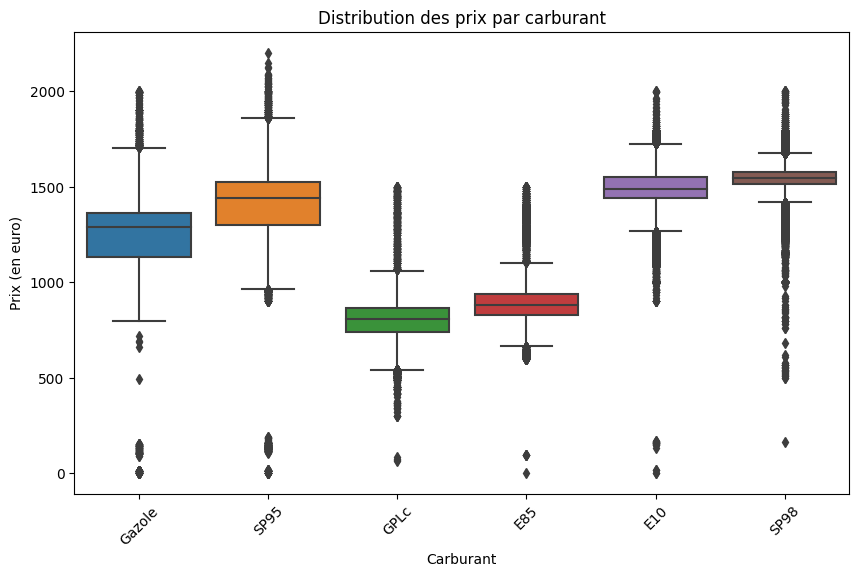

In [16]:
# Créez la figure et l'axe
fig, ax = plt.subplots(figsize=(10, 6))

# Tracer la boîte à moustaches (boxplot)
sns.boxplot(x="carburant", y="prix", data=df, ax=ax)

# Définir le titre, les étiquettes des axes y et x
ax.set_title("Distribution des prix par carburant")
ax.set_xlabel("Carburant")
ax.set_ylabel("Prix (en euro)")

# Faites pivoter les étiquettes de l'axe x pour une meilleure lisibilité si nécessaire
plt.xticks(rotation=45)
plt.show()

* **Créer une nouvelle colonne date qui contient la date de mise a jour du prix de carburant sous format aaaa-mm**

In [17]:
# Utilisez pd.to_datetime pour convertir la colonne en datetime
df['date_maj'] = pd.to_datetime(df['date_maj'])

# Extraire le mois et l'année à partir de la colonne 'maj'
df['mois'] = df['date_maj'].dt.month
df['annee'] = df['date_maj'].dt.year

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12992189 entries, 0 to 13001595
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   carburant  object        
 1   date_maj   datetime64[ns]
 2   prix       float64       
 3   mois       int64         
 4   annee      int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 594.7+ MB


* **Déviser le prix des carbuants en 1000 pour qu'il donne le prix en euro/litre**

In [19]:
df["prix"] = df["prix"]/1000

* **Explorer les catégories des carburants**

In [20]:
categories_uniques = df['carburant'].unique()
print(categories_uniques)

['Gazole' 'SP95' 'GPLc' 'E85' 'E10' 'SP98']


## 3/Visualisation

* **Tracer la variation de prix mensuelle de chaque type de carburants**

In [21]:
# Groupez les données par 'carburant', 'annee' et 'mois', puis calculez la moyenne des prix
moyenne_mensuelle = df.groupby(['carburant', 'annee', 'mois'])['prix'].mean().reset_index()

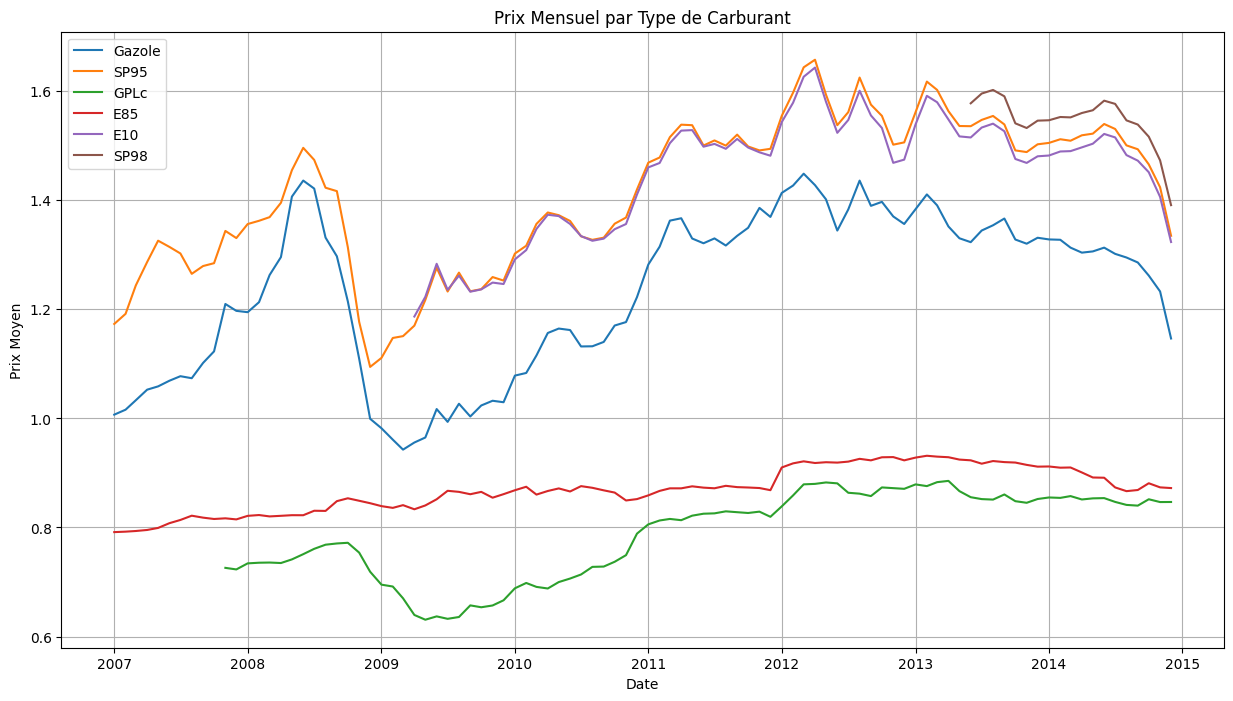

In [22]:
# Créez un graphique unique avec des courbes de prix pour chaque type de carburant
carburants = df['carburant'].unique()

plt.figure(figsize=(15, 8))

for carburant in carburants:
    data_carburant = moyenne_mensuelle[moyenne_mensuelle['carburant'] == carburant]
    data_carburant['date'] = pd.to_datetime(data_carburant['annee'].astype(str) + '-' + data_carburant['mois'].astype(str) + '-01')
    plt.plot(data_carburant['date'], data_carburant['prix'], label=carburant)

plt.title('Prix Mensuel par Type de Carburant')
plt.xlabel('Date')
plt.ylabel('Prix Moyen')
plt.grid(True)
plt.legend()
plt.show()

* **Creer la  colonne de l'écart entre le carburant SP95 et gazole**

In [23]:
#Créez une nouvelle colonne 'annee_mois' en utilisant la méthode strftime
df['annee_mois'] = df['date_maj'].dt.strftime('%Y-%m')

# Groupez les données par 'annee_mois', 'carburant' et calculez la moyenne des prix
df_grouped = df.groupby(['annee_mois', 'carburant'])['prix'].mean().unstack()

# Calculez la colonne 'écart' en divisant les prix de SP95 par les prix de Gazole
df_grouped['écart'] = df_grouped['SP95'] - df_grouped['Gazole']

# Réinitialisez l'index pour obtenir une DataFrame propre
df_ecart = df_grouped.reset_index()

# Renommez la colonne 'annee_mois' en 'date'
df_ecart.rename(columns={'annee_mois': 'date'}, inplace=True)
df_ecart

carburant,date,E10,E85,GPLc,Gazole,SP95,SP98,écart
0,2007-01,NaN,0.791510,NaN,1.006874,1.173170,NaN,0.166295
1,2007-02,NaN,0.792355,NaN,1.015969,1.191732,NaN,0.175762
2,2007-03,NaN,0.793553,NaN,1.033281,1.243828,NaN,0.210547
3,2007-04,NaN,0.795446,NaN,1.052674,1.286718,NaN,0.234044
4,2007-05,NaN,0.799185,NaN,1.058717,1.325858,NaN,0.267141
...,...,...,...,...,...,...,...,...
91,2014-08,1.482784,0.866609,0.841397,1.295008,1.500621,1.546463,0.205613
92,2014-09,1.472585,0.868704,0.840068,1.285891,1.493466,1.538783,0.207576
93,2014-10,1.451393,0.881099,0.851735,1.261897,1.465776,1.516537,0.203880
94,2014-11,1.406155,0.873552,0.846613,1.232752,1.423846,1.473092,0.191094


* **On a 5 catégories de carburants et Le GPLc est un carburant gazeux composé principalement de propane et de butane (Gaz de Pétrole Liquéfié pour les véhicules de type C) mais généralement il est pas considéré comme "sans plomb".**

* **On supprimer donc les lignes où la colonne 'nom' est égale à 'GPLc'**

In [24]:
df.drop(df[df['carburant'] == 'GPLc'].index, inplace=True)

* **A part le gazole toutes les catégorie de carburants restant entrent dans la catégorie Sans_Plomb**

In [25]:
carburants = {'Gazole': 'Gazole', 'SP95': 'Sans Plomb', 'SP98': 'Sans Plomb', 'E10': 'Sans Plomb', 'E85': 'Sans Plomb'}
df['carburant'] = df['carburant'].map(carburants)

In [26]:
df

,carburant,date_maj,prix,mois,annee,annee_mois
0,Gazole,2007-01-04 18:43:38.841521,0.999,1,2007,2007-01
1,Gazole,2007-01-09 08:32:48.501587,0.999,1,2007,2007-01
2,Gazole,2007-01-12 08:42:13.582039,0.989,1,2007,2007-01
3,Gazole,2007-01-16 16:18:28.004618,0.988,1,2007,2007-01
4,Gazole,2007-01-17 09:16:37.487625,0.988,1,2007,2007-01
...,...,...,...,...,...,...
13001591,Sans Plomb,2014-12-23 06:20:36.000000,1.339,12,2014,2014-12
13001592,Sans Plomb,2014-12-24 05:52:33.000000,1.333,12,2014,2014-12
13001593,Sans Plomb,2014-12-26 06:53:16.000000,1.329,12,2014,2014-12
13001594,Sans Plomb,2014-12-29 08:18:04.000000,1.325,12,2014,2014-12


* **Évolution des prix du carburant Gazole et Sans Plomb de l'année 2007 à 2015**

In [30]:
# Groupement et calcul de la moyenne des prix par carburant et année-mois
moyenne_mensuelle = df.groupby(['annee', 'mois', 'carburant'])['prix'].mean().unstack().reset_index()
# # Supprimez l'index et réinitialisez-le
# moyenne_mensuelle = moyenne_mensuelle.reset_index(drop=True)
moyenne_mensuelle['date'] = pd.to_datetime(moyenne_mensuelle['annee'].astype(str) + '-' + moyenne_mensuelle['mois'].astype(str) + '-01')
# moyenne_mensuelle['date'] = moyenne_mensuelle['date'].dt.strftime('%Y-%m')
moyenne_mensuelle.set_index('date', inplace=True)

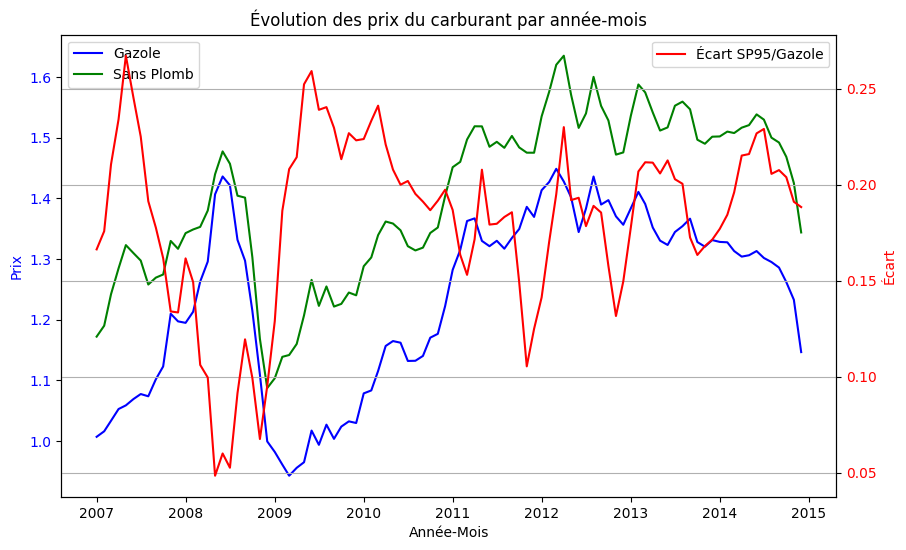

In [31]:
# Créez une figure et des axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Créez un graphique de ligne pour Gazole et Sans Plomb
ax1.plot(moyenne_mensuelle.index, moyenne_mensuelle['Gazole'], label='Gazole', color='b')
ax1.plot(moyenne_mensuelle.index, moyenne_mensuelle['Sans Plomb'], label='Sans Plomb', color='g')
ax1.set_xlabel('Année-Mois')
ax1.set_ylabel('Prix', color='b')
ax1.set_title('Évolution des prix du carburant par année-mois')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Assurez-vous que la colonne 'date' est de type datetime
df_ecart['date'] = pd.to_datetime(df_ecart['date'])

# Créez un deuxième axe y pour les écarts
ax2 = ax1.twinx()
ax2.plot(df_ecart['date'], df_ecart['écart'], label='Écart SP95/Gazole', color='r')
ax2.set_ylabel('Écart', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(loc='upper right')

# Affichez le graphique
plt.xticks(rotation=45)
plt.grid(True)
plt.show()